# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Using a zip object to combine the two lists
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
print(city_count)

577


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
# Setup for the weather API call
base_url = 'http://api.openweathermap.org/data/2.5/weather?'

# units
units = 'imperial'

# lists for each column
city_list = []
cloudiness = []
country = []
dates = []
humidity = []
lat = []
lng = []
maxTemp = []
windSpeed = []

city_count = 0

# Loop through cities and make the call...
for city in cities:

    # Build query URL
    query_url = base_url + 'appid=' + api_key + '&q=' + city.replace(' ', '%20') +'&units=' + units
  
    city_data = requests.get(query_url).json()
  
    # try to append the dictionairy values to the individual lists
    try:
        city_list.append(city_data['name'])
        cloudiness.append(city_data['clouds']['all'])
        country.append(city_data['sys']['country'])
        unix_ts = int(city_data['dt'])
        dates.append(datetime.fromtimestamp(unix_ts)) 
        humidity.append(city_data['main']['humidity'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        maxTemp.append(city_data['main']['temp_max'])
        windSpeed.append(city_data['wind']['speed'])
        city_count += 1
        print(f'Processing city # {city_count}')

    except:
        print(f'Cannot find city: {city}')


Processing city # 1
Processing city # 2
Cannot find city: kadykchan
Processing city # 3
Processing city # 4
Processing city # 5
Processing city # 6
Processing city # 7
Processing city # 8
Processing city # 9
Processing city # 10
Processing city # 11
Cannot find city: illoqqortoormiut
Processing city # 12
Processing city # 13
Processing city # 14
Processing city # 15
Processing city # 16
Processing city # 17
Processing city # 18
Processing city # 19
Processing city # 20
Processing city # 21
Processing city # 22
Processing city # 23
Processing city # 24
Processing city # 25
Processing city # 26
Processing city # 27
Processing city # 28
Processing city # 29
Processing city # 30
Processing city # 31
Processing city # 32
Processing city # 33
Processing city # 34
Processing city # 35
Processing city # 36
Processing city # 37
Processing city # 38
Processing city # 39
Processing city # 40
Processing city # 41
Cannot find city: taolanaro
Processing city # 42
Processing city # 43
Processing city

Processing city # 327
Processing city # 328
Processing city # 329
Processing city # 330
Processing city # 331
Processing city # 332
Processing city # 333
Cannot find city: tsihombe
Processing city # 334
Processing city # 335
Processing city # 336
Processing city # 337
Processing city # 338
Processing city # 339
Cannot find city: dzhusaly
Processing city # 340
Processing city # 341
Processing city # 342
Cannot find city: marcona
Processing city # 343
Processing city # 344
Processing city # 345
Processing city # 346
Processing city # 347
Processing city # 348
Processing city # 349
Processing city # 350
Cannot find city: acarau
Processing city # 351
Cannot find city: qui nhon
Cannot find city: gilazi
Processing city # 352
Processing city # 353
Processing city # 354
Processing city # 355
Processing city # 356
Processing city # 357
Processing city # 358
Processing city # 359
Processing city # 360
Processing city # 361
Processing city # 362
Processing city # 363
Processing city # 364
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
city_df = pd.DataFrame({
    'name': city_list,
    'cloudiness': cloudiness,
    'country': country,
    'date': dates,
    'humidity': humidity,
    'lat': lat,
    'lng': lng,
    'maxTemp': maxTemp,
    'windSpeed': windSpeed
})

city_df.to_csv('city_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Max Temperature on 2019-11-14 17:34:32')

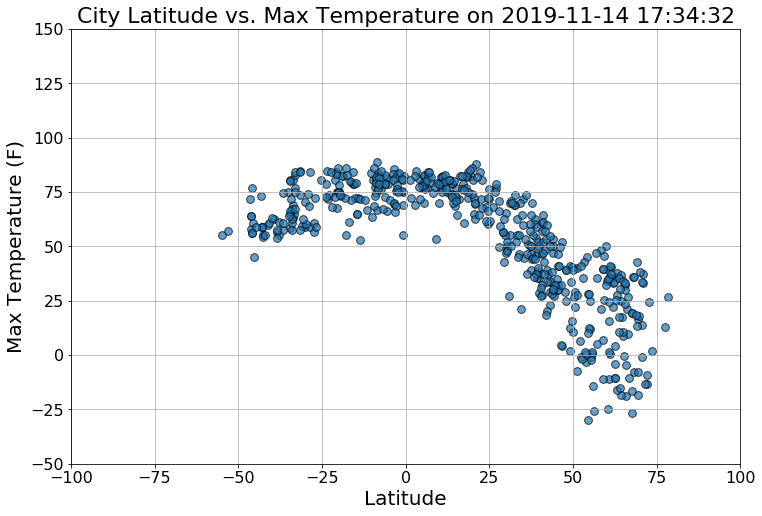

In [29]:
current_date =  city_df['date'][0]

city_df.plot.scatter('lat', 'maxTemp', s=60, edgecolor='black', alpha=.70,
                figsize=(12, 8), fontsize=16, grid=True, 
                xlim=(-100, 100), ylim=(-50, 150))

plt.ylabel('Max Temperature (F)', fontsize=20)
plt.xlabel('Latitude', fontsize=20)
plt.title(f'City Latitude vs. Max Temperature on {current_date}', fontsize=22)

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity on 2019-11-14 17:34:32')

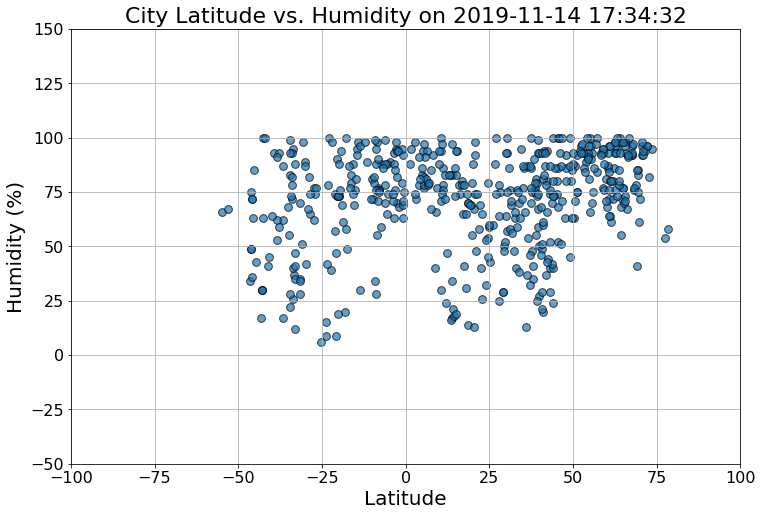

In [30]:
current_date =  city_df['date'][0]

city_df.plot.scatter('lat', 'humidity', s=60, edgecolor='black', alpha=.70,
                figsize=(12, 8), fontsize=16, grid=True, 
                xlim=(-100, 100), ylim=(-50, 150))

plt.ylabel('Humidity (%)', fontsize=20)
plt.xlabel('Latitude', fontsize=20)
plt.title(f'City Latitude vs. Humidity on {current_date}', fontsize=22)

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness on 2019-11-14 17:34:32')

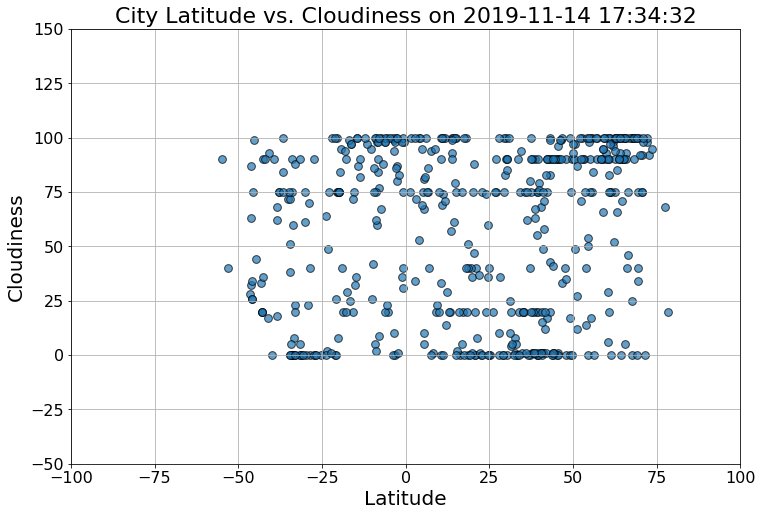

In [31]:
current_date =  city_df['date'][0]

city_df.plot.scatter('lat', 'cloudiness', s=60, edgecolor='black', alpha=.70,
                figsize=(12, 8), fontsize=16, grid=True, 
                xlim=(-100, 100), ylim=(-50, 150))

plt.ylabel('Cloudiness', fontsize=20)
plt.xlabel('Latitude', fontsize=20)
plt.title(f'City Latitude vs. Cloudiness on {current_date}', fontsize=22)

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed on 2019-11-14 17:34:32')

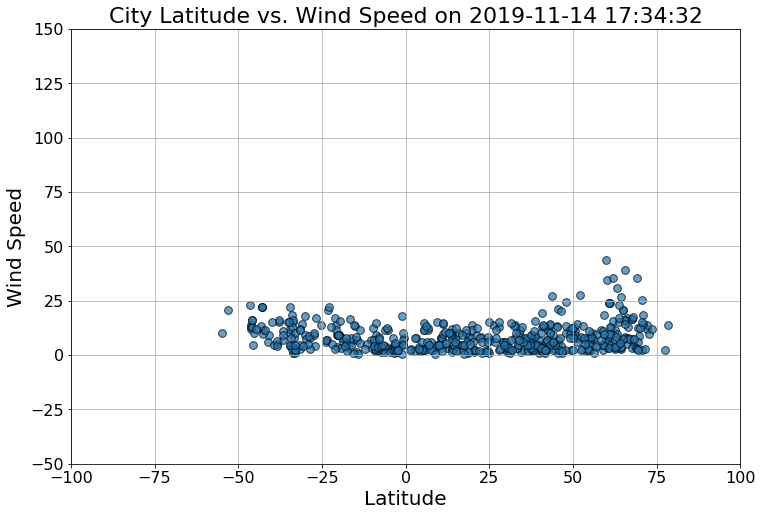

In [32]:
current_date =  city_df['date'][0]

city_df.plot.scatter('lat', 'windSpeed', s=60, edgecolor='black', alpha=.70,
                figsize=(12, 8), fontsize=16, grid=True, 
                xlim=(-100, 100), ylim=(-50, 150))

plt.ylabel('Wind Speed', fontsize=20)
plt.xlabel('Latitude', fontsize=20)
plt.title(f'City Latitude vs. Wind Speed on {current_date}', fontsize=22)